 ## Exploring factors that contributed to the survival of passengers on the Titanic

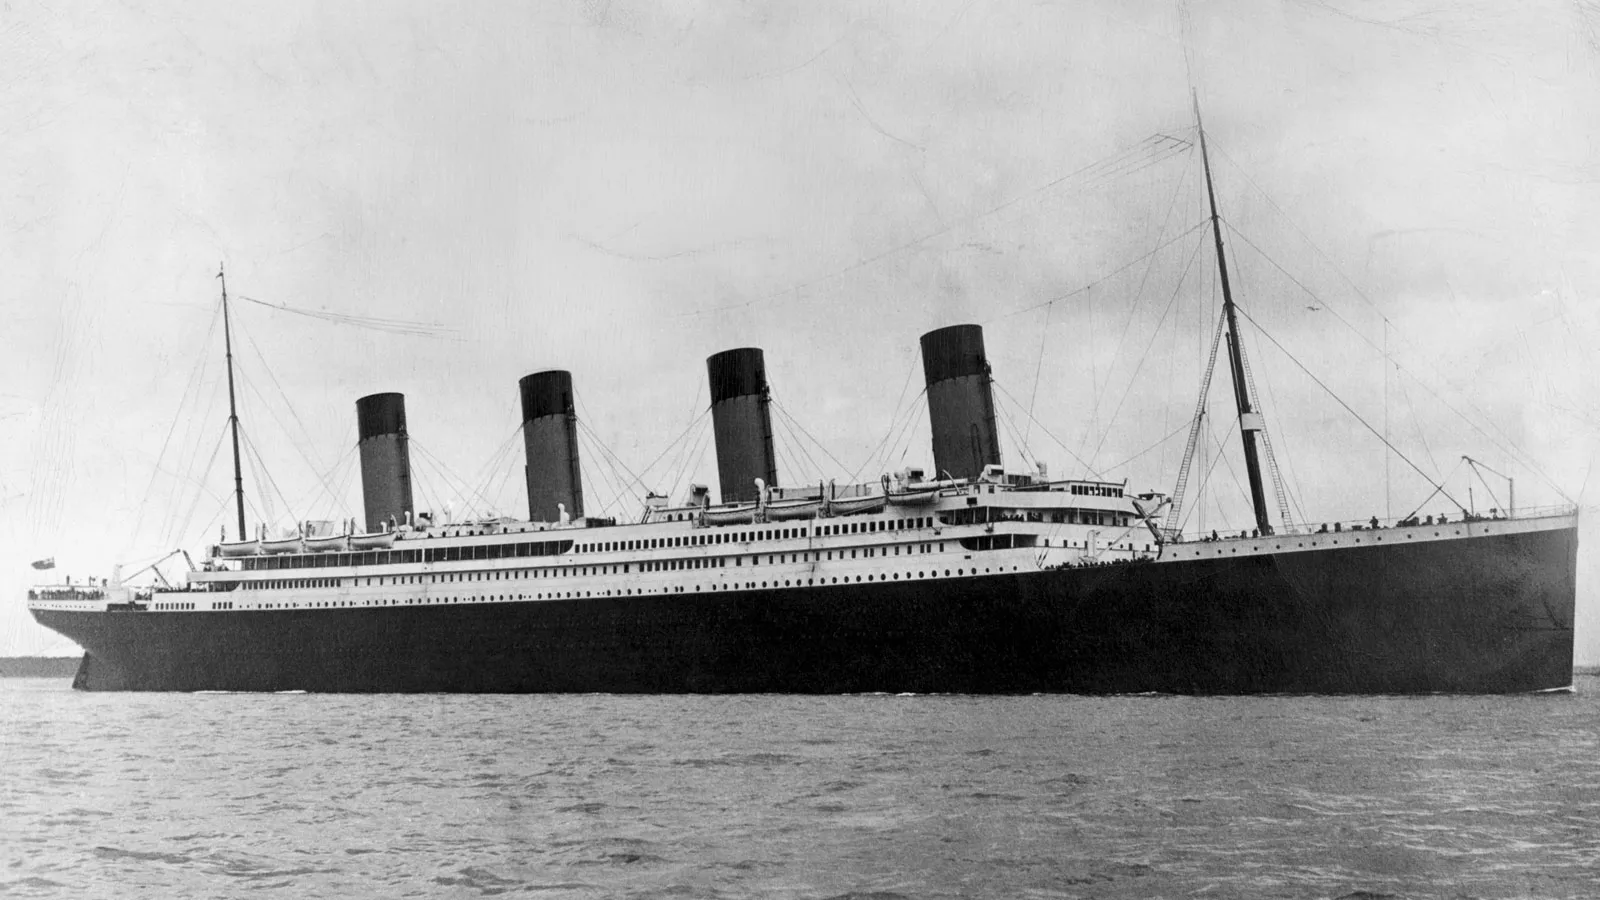

### 
On April 10 1912, the RMS Titanic embarked on its maiden voyage, sailing from Southampton, England, to New York City. Four days
later the luxury liner struck an iceberg, and early the next day it sank, killing some 1,500 people. The tragedy captured
the world's imagination and made the Titanic an enduring legend.

The dataset used in the EDA was gotten from https://www.kaggle.com/competitions/titanic/data?select=train.csv

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# load data into dataframe 
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**All the data types are appropriate**

In [4]:
df.shape
print (f"The shape of the dataframe is {df.shape}")

The shape of the dataframe is (891, 12)


### The dataset contains 891 rows and 12 columns.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##
**Brief description of the columns:**

**Pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
**Age** - Age in years

**Sibsp** - of siblings / spouses aboard the Titanic  	
**Parch** - of parents / children aboard the Titanic	

**Ticket** - Ticket number	
**Fare** - Passenger fare	

**Cabin** - Cabin number	
**Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# identifying missing values
pd.DataFrame(df.isnull().sum(), columns = ["Missing values"])


,Missing values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# checking for duplicates
df.duplicated().sum()

0

**There are no duplicates records in the dataset**

## Data Cleaning

1. Handling missing values - Three columns have missing values:Age, Cabin and Embarked.
2. The Cabin column will be dropped, the rows missing the age attribute will be dropped, the embarked will be replaced with the mode.
3.  Categorizing the age column.

In [9]:
# droping the cabin column 
df.drop(columns = "Cabin", inplace = True)

In [10]:
#Replacing the missing values in the Embarked column with the most occurring
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Port "S" is the mode, hence, the empty values would be replaced with "S"**

In [11]:
df["Embarked"].fillna("S", inplace = True)

In [12]:
df.dropna(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [14]:
df["Age Category"] = pd.cut(x = df["Age"], bins = [0,10,20,30,40,50,60,70,80,90], 
                            labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","Above 80"])

In [15]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age Category    0
dtype: int64

### Data is now clean and ready to be analyzed.

## EXPLORATORY DATA ANALYSIS

In [16]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,714.0,448.582633,259.119524,1.00,222.250,445.0000,677.750,891.0000
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0000,1.000,1.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292


## Observations
1. There are 714 records of passengers.
2. The minimum, median and maximum ages are 0.4 (about 5months), 28 and 80years respectively.
3. The average passenger fare is about 34.69 while the maximum is about 512.23
4. There is a survival rate of 40.61%

In [17]:
df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


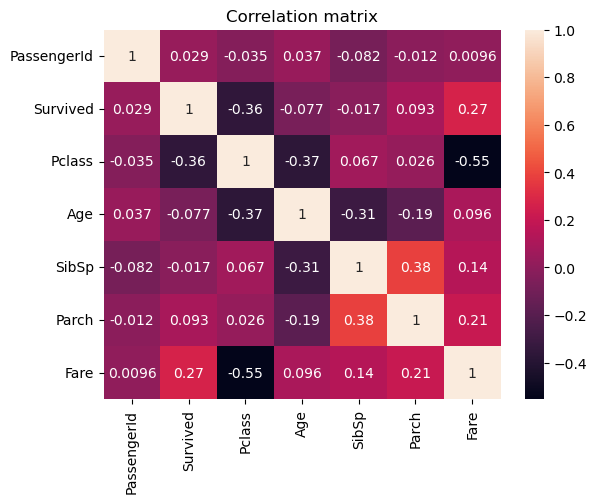

In [18]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title("Correlation matrix");

## Observations


In [70]:
# Percentage of passengers that survived
df["Survived"].value_counts()#/
#df["PassengerId"].count()#)*100)

Survived
0    424
1    290
Name: count, dtype: int64

In [84]:
df["Sex"].value_counts()

Sex
male      453
female    261
Name: count, dtype: int64

In [95]:
# Percentage of males that survived from total males on board

df_male = df["Sex"] == "male" 
df_surv = df["Survived"] == 1
df_male_surv = df_male & df_surv
male_surv = (df_male_surv.sum()/df_male.sum() *100).round(2)
print (f"The percentage of males that survived from the total males present onboard is {male_surv}")

The percentage of males that survived from the total males present onboard is 20.53


In [96]:
# Percentage of females that survived from total females on board
df_female = df["Sex"] == "female" 
df_surv = df["Survived"] == 1
df_female_surv = df_female & df_surv
female_surv = (df_female_surv.sum()/df_female.sum() *100).round(2)
print (f"The percentage of males that survived from the total males present onboard is {female_surv}")

The percentage of males that survived from the total males present onboard is 75.48


In [19]:
# Percentage of passengers that survived
(df["Survived"].value_counts()/(df["Survived"].value_counts()).sum())*100

Survived
0    59.383754
1    40.616246
Name: count, dtype: float64

 **40% of passengers survived.**

## Survival Rate based on different features

In [20]:
#Survival rate by Passenger Class
df_Pclass = df["Survived"].groupby(by=df["Pclass"]).sum()

In [21]:
df_Pclass

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64

In [22]:
perecentage_survived_by_Pclass = df_Pclass/df_Pclass.sum()*100
perecentage_survived_by_Pclass

Pclass
1    42.068966
2    28.620690
3    29.310345
Name: Survived, dtype: float64

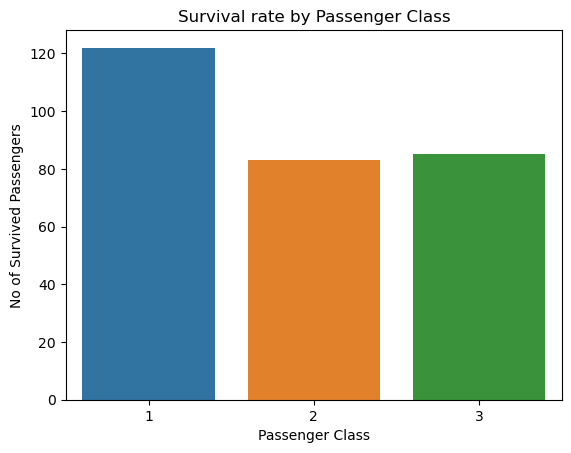

In [23]:
sns.barplot(x="Pclass", y ="Survived", data= df_Pclass.reset_index())
plt.xlabel("Passenger Class")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Passenger Class");

In [24]:
#Survival rate by Gender
df_gender = df["Survived"].groupby(by=df["Sex"]).sum()
df_gender

Sex
female    197
male       93
Name: Survived, dtype: int64

In [25]:
percent_gender = df_gender/df_gender.sum()*100
percent_gender

Sex
female    67.931034
male      32.068966
Name: Survived, dtype: float64

**68% of famales survived, while 32% of males survived.**

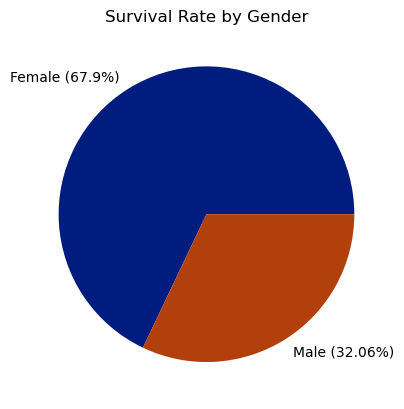

In [26]:
keys = ["Female (67.9%)", "Male (32.06%)"]
palette_color = sns.color_palette("dark")
plt.pie (df_gender, labels=keys, colors=palette_color)
plt.title ("Survival Rate by Gender");

In [27]:
# Survival Rate by Age 
df_age = df["Survived"].groupby(by=df["Age"]).sum().reset_index()
df_sorted_age = df_age.sort_values(by = "Survived", ascending = False)

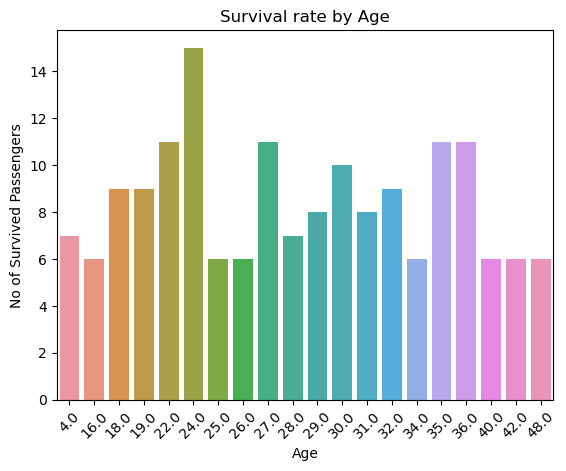

In [28]:
sns.barplot(x="Age", y ="Survived", data= df_sorted_age[0:20])
plt.xlabel("Age")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Age")
plt.xticks(rotation = 45);

In [29]:
# Survival Rate by Age Category
df_age_category = df["Survived"].groupby(by=df["Age Category"]).sum().reset_index()
df_age_category

,Age Category,Survived
0,0-9,38
1,10-19,44
2,20-29,84
3,30-39,69
4,40-49,33
5,50-59,17
6,60-69,4
7,70-79,1
8,Above 80,0


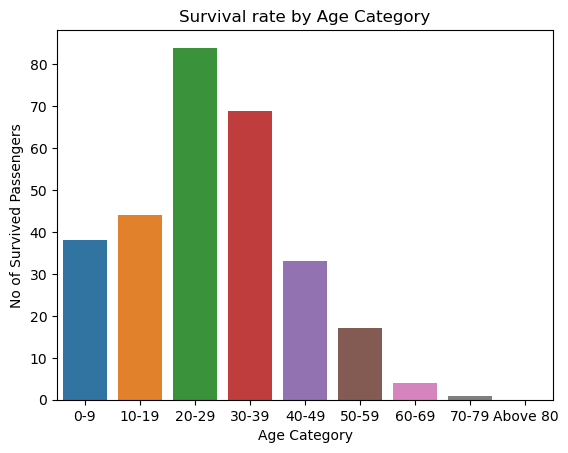

In [30]:
sns.barplot(x="Age Category", y ="Survived", data= df_age_category)
plt.xlabel("Age Category")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Age Category");

In [31]:
# Survival Rate based on Point of Embarkation
df_Embarked = df["Survived"].groupby(by=df["Embarked"]).sum()
df_Embarked

Embarked
C     79
Q      8
S    203
Name: Survived, dtype: int64

In [32]:
#Percentage of Survivors by Embarked
df_Embarked/df_Embarked.sum()*100

Embarked
C    27.241379
Q     2.758621
S    70.000000
Name: Survived, dtype: float64

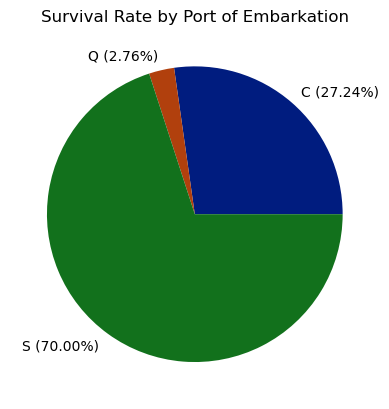

In [33]:
keys = ["C (27.24%)", "Q (2.76%)", "S (70.00%)"]
palette_color = sns.color_palette("dark")
plt.pie (df_Embarked, labels=keys, colors=palette_color)
plt.title("Survival Rate by Port of Embarkation");

In [34]:
# Survival Rate based on Number of Siblings and Spouses
df_Sibsp = df["Survived"].groupby(by=df["SibSp"]).sum().reset_index()
df_Sibsp

,SibSp,Survived
0,0,175
1,1,97
2,2,11
3,3,4
4,4,3
5,5,0


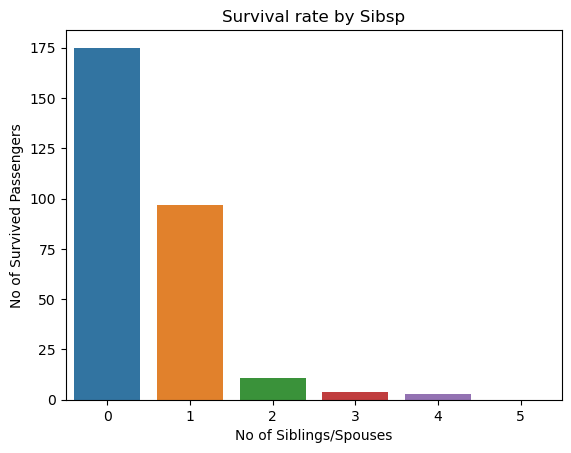

In [35]:
sns.barplot(x="SibSp", y ="Survived", data= df_Sibsp)
plt.xlabel("No of Siblings/Spouses")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Sibsp");

## Univariate Analysis

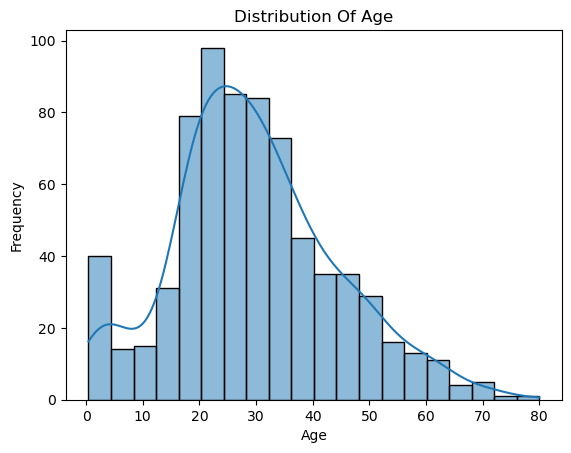

In [36]:
sns.histplot(df["Age"], bins = 20, kde =1)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution Of Age");

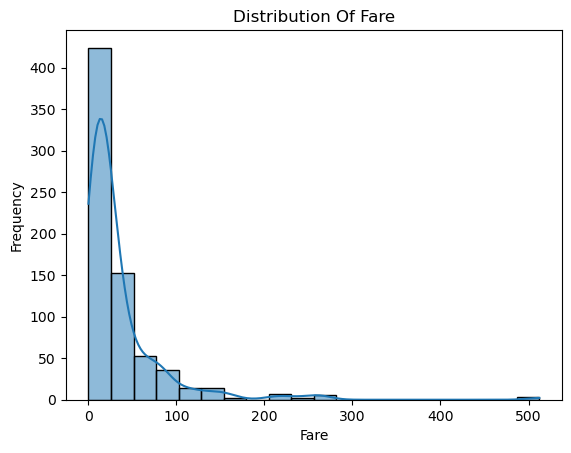

In [37]:
sns.histplot(df["Fare"], bins = 20, kde =1)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution Of Fare");

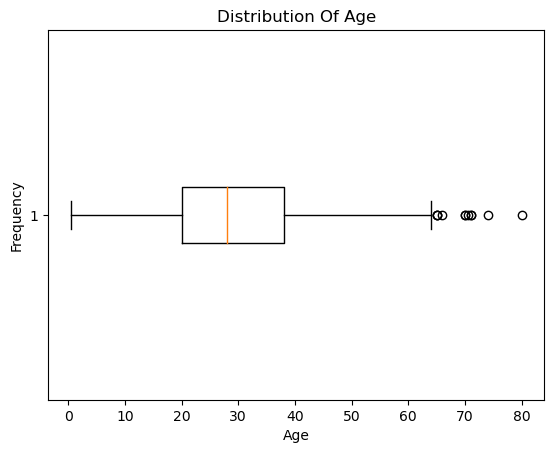

In [38]:
plt.boxplot(df["Age"], vert=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution Of Age");

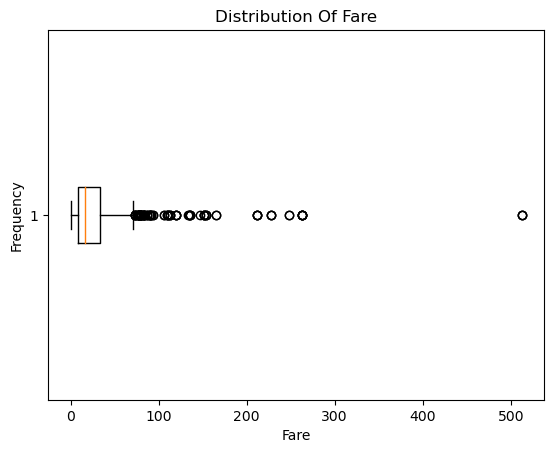

In [39]:
plt.boxplot(df["Fare"], vert = False)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution Of Fare");

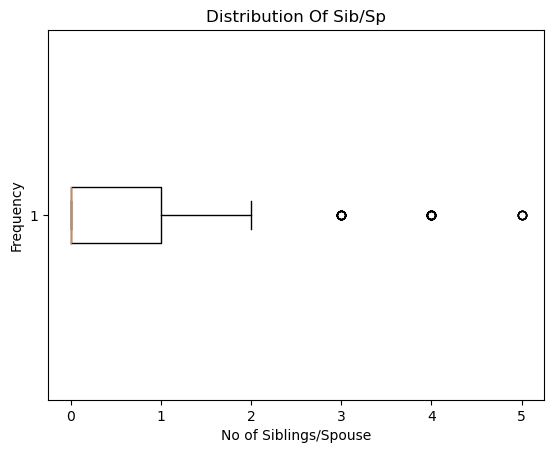

In [40]:
plt.boxplot(df["SibSp"], vert = False)
plt.xlabel("No of Siblings/Spouse")
plt.ylabel("Frequency")
plt.title("Distribution Of Sib/Sp");

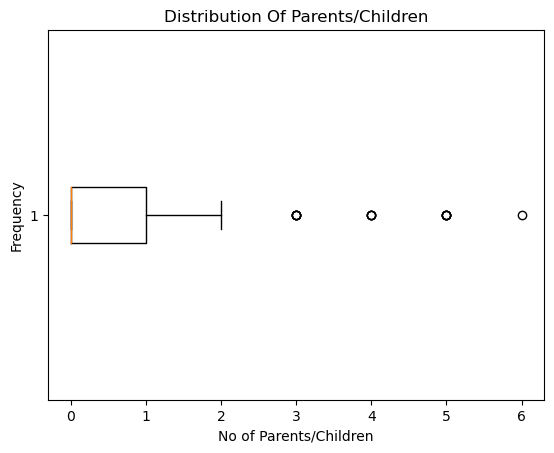

In [41]:
plt.boxplot(df["Parch"], vert = False)
plt.xlabel("No of Parents/Children")
plt.ylabel("Frequency")
plt.title("Distribution Of Parents/Children");

## Categorical Data

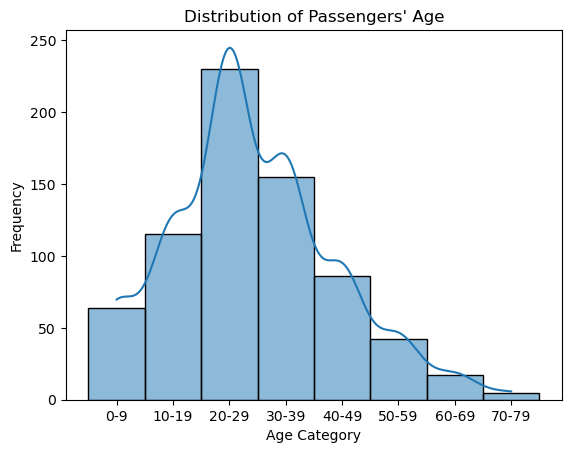

In [42]:
sns.histplot(df["Age Category"], kde = 1)
plt.ylabel("Frequency")
plt.title("Distribution of Passengers' Age");

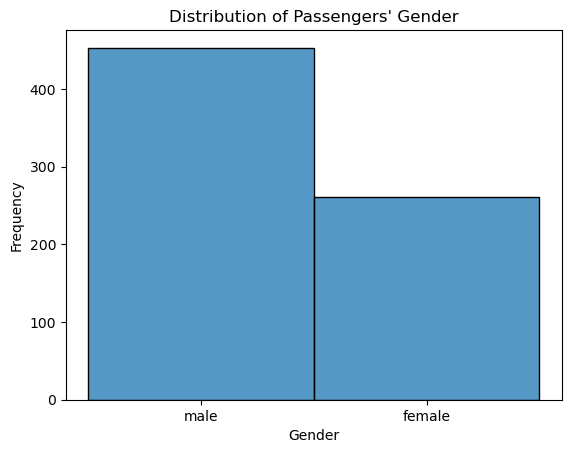

<Figure size 500x300 with 0 Axes>

In [43]:
sns.histplot(df["Sex"])
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.title("Distribution of Passengers' Gender")
plt.figure(figsize = (5,3));

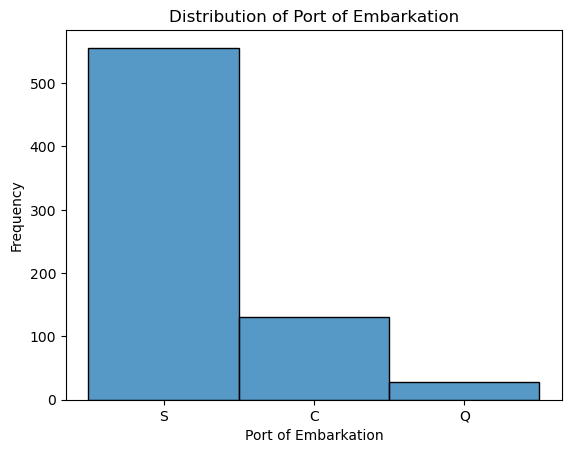

In [44]:
sns.histplot(df["Embarked"])
plt.ylabel("Frequency")
plt.xlabel("Port of Embarkation")
plt.title("Distribution of Port of Embarkation");

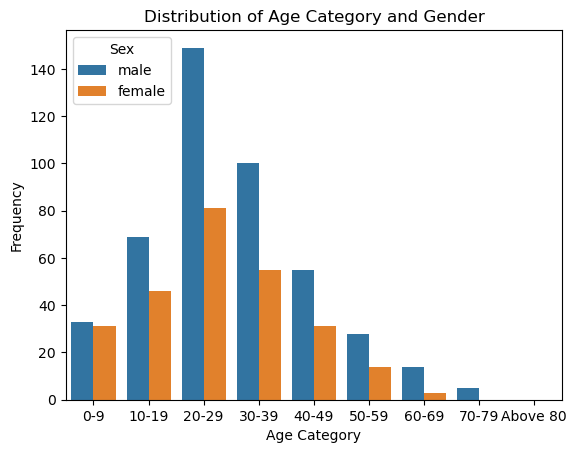

In [45]:
sns.countplot(data = df, x = "Age Category", hue = "Sex")
plt.ylabel("Frequency")
plt.title("Distribution of Age Category and Gender");

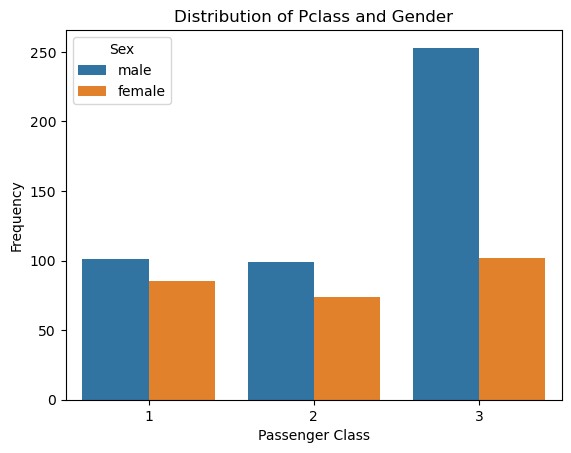

In [46]:
sns.countplot(data = df, x= "Pclass", hue = "Sex" )
plt.ylabel("Frequency")
plt.xlabel("Passenger Class")
plt.title("Distribution of Pclass and Gender");

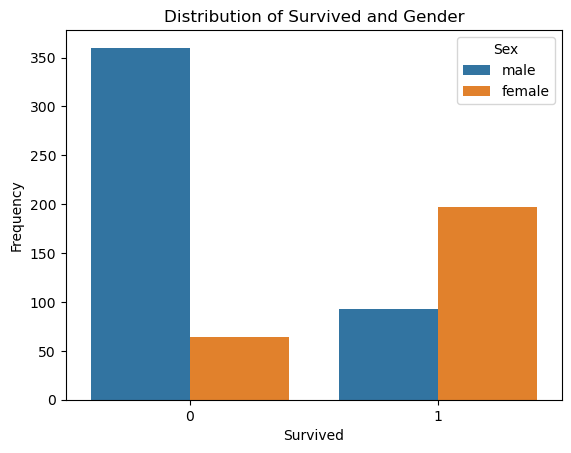

In [47]:
sns.countplot(data = df, x= "Survived", hue = "Sex" )
plt.ylabel("Frequency")
plt.xlabel("Survived")
plt.title("Distribution of Survived and Gender");

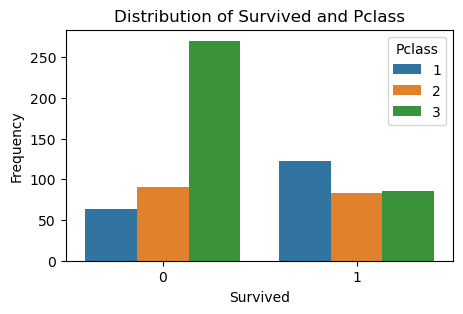

In [48]:
plt.figure(figsize = (5,3))
sns.countplot(data = df, x= "Survived", hue = "Pclass" )
plt.ylabel("Frequency")
plt.xlabel("Survived")
plt.title("Distribution of Survived and Pclass");

In [49]:
# Average Age Of People that Survived(1) and those that didn't(0)
df.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

## Analysis Questions

1. What percentage of passengers survived the Titanic? 
**40%**
2. What was the survival rate for each Pclass?
**First Class = 42.068966,**
**Second Class = 28.620690,**
**Third Class = 29.310345**
3. Were gender and survival correlated? Provide statistics.
**Considering that there were significantly more males than females on board, 32% out of survivors were males while 68% of out survivors were females, this shows high correlation betwwen survival and gender, as Females had higher survival rate than Males**
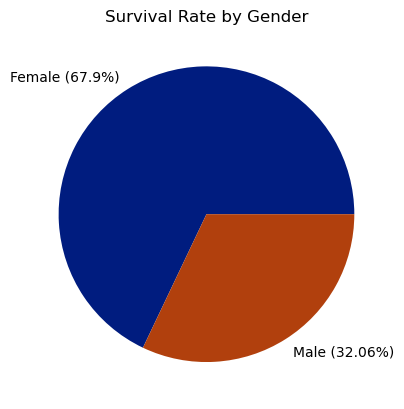
4. What was the average age of survivors and non-survivors?
**Non-Survivors = 30.6,**
**Survivors = 28.3**
5. Did having siblings or spouses on board affect the survival rate?
**Yes. Those with no siblings had the highest survival rate, followed by those with one sibling, then two, three and four**
6. What was the survival rate based on the port of embarkation?
**Cherbourg (C) 27.241379,**
**Queenstown (Q) 2.758621,**
**Southampton (S) 70.000000**

7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?
**According to our correlation matrix in cell 18, correlation value between Survived and Fare is at 0.27, which shows a positive correlation. This suggests that passengers who paid a higher fare had higher chances of survival.**

8. Were age and Pclass correlated? Provide a visualization.
**Yes, They are negatively correlated with a value of -0.369. This plot shows older the passengers the lower the passenger the lower class i.e Class 1, which is first class.**
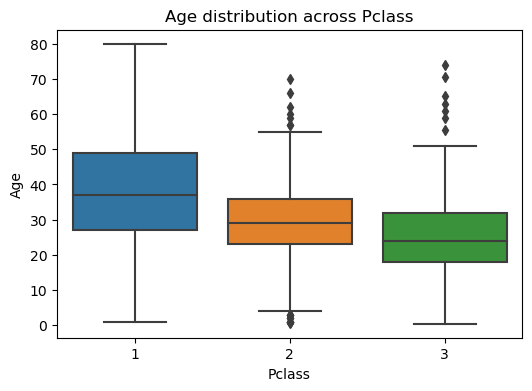



In [60]:
 df["Age"].corr(df["Pclass"])

-0.36922601531551735

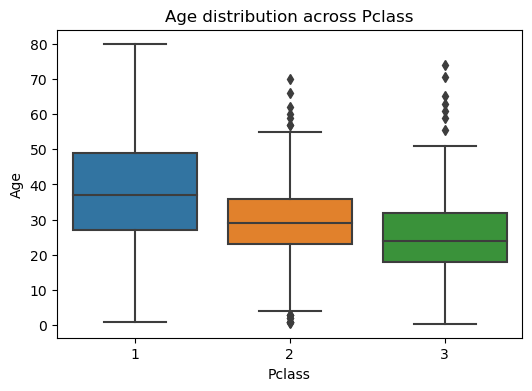

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age distribution across Pclass")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()